1.1 Example: Polynomial Curve Fitting

"Now suppose that we are given a training set comprising N observations of x, written x ≡ (x1 , . . . , xN )T , together with corresponding observations of the values of t, denoted t ≡ (t1, . . . , tN )T. Figure 1.2 shows a plot of a training set comprising N = 10 data points. The input data set x in Figure 1.2 was generated by choos- ing values of xn, for n = 1,...,N, spaced uniformly in range [0,1], and the target data set t was obtained by first computing the corresponding values of the function sin(2πx) 

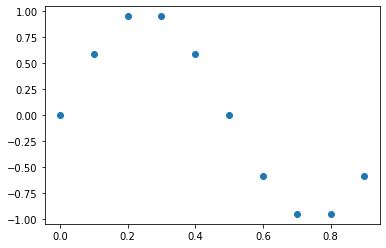

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x_max = 1
x_min = 0
N = 10

x = np.arange(x_min,x_max,(x_max - x_min)/N )
t = np.sin(2*np.pi*x)
plt.plot(x,t,'o')

and then adding a small level of random noise having a Gaussian distri- bution (the Gaussian distribution is discussed in Section 1.2.4) to each such point in order to obtain the corresponding value tn. "

In [4]:
noise = np.random.normal(0,0.1,10)
print(noise)
t += noise

[-0.00132282  0.16153072  0.15998231  0.07100478  0.01216626  0.06586263
 -0.0193657   0.08767825  0.10844995 -0.04700263]


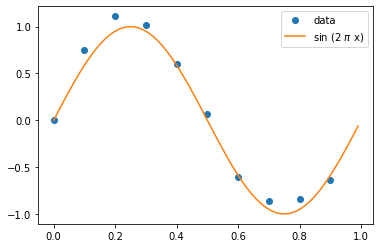

In [5]:
plt.plot(x,t,'o', label = 'data')
x_for_sinx = np.arange(x_min,x_max,(x_max - x_min)/100 )
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

"Our goal is to exploit this training set in order to make predictions of the value t of the target variable for some new value x of the input variable. 

we shall proceed rather informally and consider a simple approach based on curve fitting. In particular, we shall fit the data using a polynomial function of the form"


In [6]:
from numpy import pi, r_
from scipy import optimize
from sklearn.metrics import mean_squared_error
from math import sqrt

N = 0

w = [0]*(N+1)

def pol(w,x,power):
    f = 0
    for i in range (0,power+1):
        f += w[i]*pow(x,i)
        #print(i, "pow  " , power, 'pow ', pow(x,power))
    return f 

w_initial = [0.5]*(N+1)

errfunc = lambda w, x, t, N: np.mean( ( pol(w, x, N) - t )**2 )

success = optimize.minimize(errfunc, w_initial[:], args=(x, t, N))
w1 = success.x
print(w1)

[0.05989838]


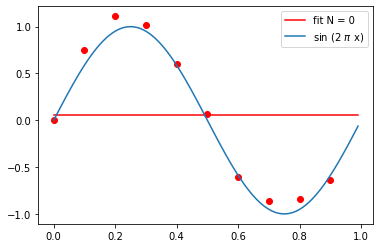

In [7]:
plt.plot(x, t, "ro")
x_for_fit = np.arange(x_min,x_max,(x_max - x_min)/100 )
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-", label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

In [505]:
# success = optimize.minimize(errfunc, w_initial[:], args=(x, t))
# w1 = success.x

# x_test = np.arange(x_min,x_max,(x_max - x_min)/100 )

# t_test = np.sin(2*np.pi*x_test)
# noise = np.random.normal(0,0.1,100)
# t_test += noise

# plt.plot(x_test, t_test, "ro")
# x_for_fit = np.arange(x_min,x_max,(x_max - x_min)/100 )
# plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-", label = 'fit N = '+ str(N)) # Plot of the data and the fit
# plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
# plt.legend()
# plt.show() 

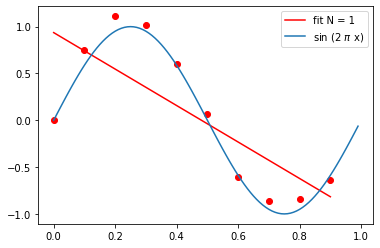

In [8]:
N=1
w_initial = [0.5]*(N+1)
success = optimize.minimize(errfunc, w_initial[:], args=(x, t,N))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x, pol(w1, x, N), "r-", label =  'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

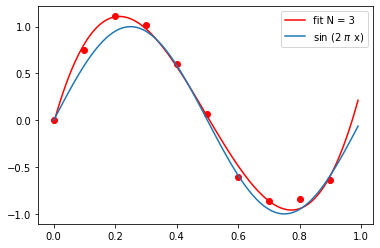

In [9]:
N=3
w_initial = [0]*(N+1)
w = [0]*(N+1)
success = optimize.minimize(errfunc, w_initial[:], args=(x, t, N))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

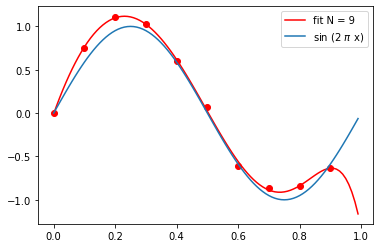

In [10]:
N=9
w_initial = [0]*(N+1)
w = [0]*(N+1)
success = optimize.minimize(errfunc, w_initial[:], args=(x, t, N))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

"As we have noted earlier, the goal is to achieve good generalization by making accurate predictions for new data. We can obtain some quantitative insight into the dependence of the generalization performance on M by considering a separate test set comprising 100 data points generated using exactly the same procedure used to generate the training set points but with new choices for the random noise values included in the target values"

Text(0.5, 1.0, 'testing 100 points with pol 9 fit')

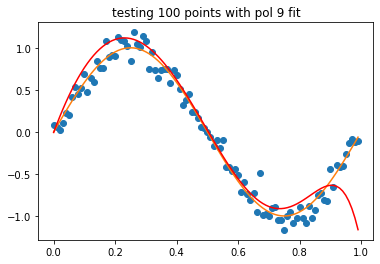

In [11]:
rms = [0]*10
rms_test = [0]*10
M = [0]*10

x_test = np.arange(x_min,x_max,(x_max - x_min)/100 )

t_test = np.sin(2*np.pi*x_test)

noise = np.random.normal(0,0.1,100)
t_test += noise
plt.plot(x_test,t_test,'o')
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.title('testing 100 points with pol 9 fit')

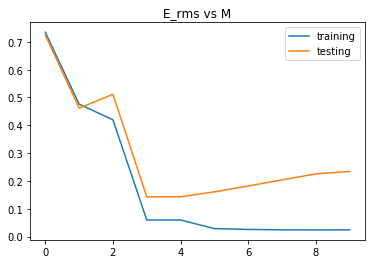

In [12]:
for i in range(0,10): 
    N = i   
    w = [0]*(N+1)
    success = optimize.minimize(errfunc, w[:], args=(x, t,N))
    w1 = success.x
    rms[i] = sqrt(mean_squared_error(t, pol(w1, x, N)))
    rms_test[i] = sqrt(mean_squared_error(t_test, pol(w1, x_test, N)))
    M[i] = N
    
plt.plot(M,rms, label = 'training')
plt.plot(M,rms_test, label = 'testing')
plt.title('E_rms vs M')
plt.legend()
plt.show() 

"One technique that is often used to control the over-fitting phenomenon in such cases is that of regularization, which involves adding a penalty term to the error function (1.2) in order to discourage the coefficients from reaching large values." 
#### add a regularization term to the error-function

$\hat{E}(w^{*}) = E(w) - \frac{\lambda}{2} w \cdot w^{T}$


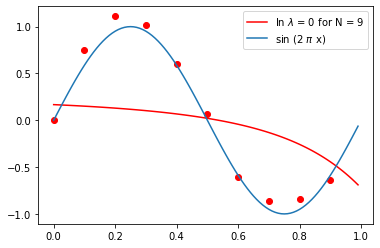

In [13]:
regweight = 1

N=9
w_initial = [0]*(N+1)
w = [0]*(N+1)
errfunc_reg = lambda w, x, t: np.mean( ( pol(w, x, N) - t )**2 ) + w.T @ w * regweight/2 
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'ln $\lambda$ = 0 for N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

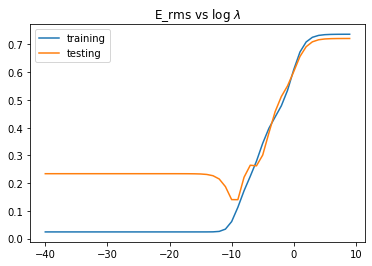

In [14]:
ln_l = [0]*50
ln_l_Erms = [0]*50
ln_l_Erms_test = [0]*50
M = [0]*50

N = 9
w = [0]*(N+1)
w_initial = [0]*(N+1)
    
ln_l_range = np.arange(-40,10,1)
#ln_l_range = threshold.tolist()

for i, val in enumerate(ln_l_range): 
    regweight = np.exp(val)
    success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
    w1 = success.x
    ln_l[i] = val
    ln_l_Erms[i] = sqrt(mean_squared_error(t, pol(w1, x, N)))
    ln_l_Erms_test[i] = sqrt(mean_squared_error(t_test, pol(w1, x_test, N)))
    
plt.plot(ln_l,ln_l_Erms, label = 'training')
plt.plot(ln_l,ln_l_Erms_test, label = 'testing')
plt.title('E_rms vs log $\lambda$')
plt.legend()
plt.show() 

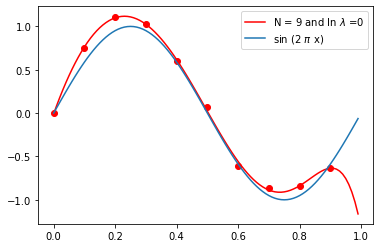

[-7.06048401e-03  9.87695695e+00 -2.14358978e+01 -3.51052886e+00
  7.83012556e+00  9.93055720e+00  6.78979414e+00  1.60411894e+00
 -3.81283237e+00 -8.59647536e+00]


In [15]:
regweight =  0
# should match with pol 9 fit without regularization. 
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'N = 9 and ln $\lambda$ ='+ str(regweight)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 
print(w1)

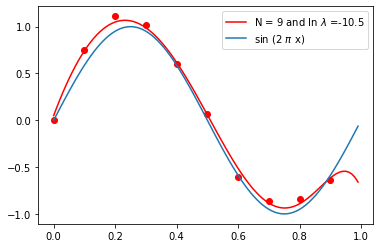

In [16]:
regweight = np.exp(-10.5)
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" ,  label = 'N = 9 and ln $\lambda$ ='+ str(np.log(regweight))) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

#### 1.2.5 Curve fitting re-visited 

"We have seen how the problem of polynomial curve fitting can be expressed in terms of error minimization. Here we return to the curve fitting example and view it from a probabilistic perspective, thereby gaining some insights into error functions and regularization, as well as taking us towards a full Bayesian treatment.
"

For this purpose, we shall assume that, given the value of x, the corresponding value of t has a Gaussian distribution with a mean equal to the value y(x, w) of the polynomial curve given by (1.1). 

In [17]:
def phi(x, dim):
    dimension = dim 
    returnVector = [0] * dimension
    for i in range(dimension): returnVector[i] += pow(x,i)
    returnVector = np.array(returnVector)
    return returnVector #return column vec

def matrix_s(alpha,beta,x,dim):
        s = alpha*np.identity(dim, dtype = float) + beta * phi(x,dim) @ phi(x,dim).T #* np.identity(dim, dtype = float)
        return np.linalg.inv(s)
    
def var(alpha, beta, new_x, x, D):
    s = matrix_s(alpha, beta,x,D)
    return pow(beta,-1) + (phi(new_x,D).T).dot(s.dot(phi(new_x,D)))

def mean(alpha,beta, new_x, t, x, D):
    sum_vec = phi(x,D) @ t
    s = matrix_s(alpha, beta,x,D)
    return beta * (phi(new_x,D).T).dot( s.dot(sum_vec) )

#### add a regularization term to the error-function

E = $\frac{\beta}{2} \sum_n( y(x_n,\textbf{w}) - t )^{2} - \frac{\lambda}{2} w \cdot w^{T}$



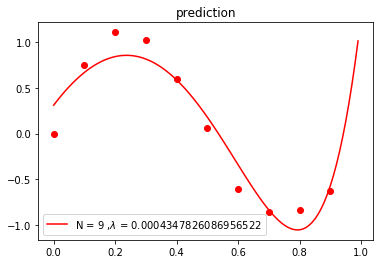

In [31]:
## x,t - training values
## x_for_fit, pol(w1, x_for_fit, N) - our prediction

alpha = 5*10**(-3)
beta = 11.5

x_for_fit = np.arange(x_min,x_max,(x_max - x_min)/100 )

N = 9
w_initial = [0]*(N+1)
w = [0]*(N+1)
errfunc_reg = lambda w, x, t: beta*np.mean( ( pol(w, x, N) - t )**2 ) + w.T @ w * alpha/2 
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'N = 9 ,$\lambda$ = '+ str(alpha/beta)) # Plot of the data and the fit
#plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.title('prediction')
plt.legend()
plt.show() 

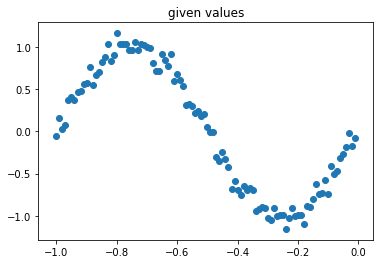

In [32]:
alpha = 5*10**(-3)
beta = 11.1
M = 9

x_known = np.arange(-1,0,0.01)
t_known = np.sin(2*np.pi*x_known)
noise = np.random.normal(0,0.1,100)
t_known += noise

plt.scatter(x_known,t_known)
plt.title('given values')
plt.show()

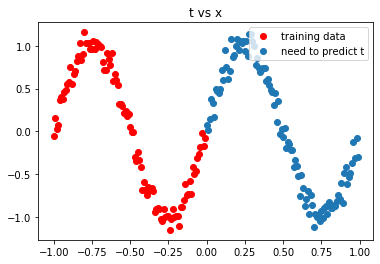

In [33]:
plt.plot(x_known, t_known, "ro",label = 'training data')

x_prediction = np.arange(0,1,0.01)
t_prediction = np.sin(2*np.pi*x_prediction)
noise = np.random.normal(0,0.1,100)
t_prediction += noise

plt.plot(x_prediction, t_prediction, "o",label = 'need to predict t')
#plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'N = 9 ,$\lambda$ = '+ str(a/b)) # Plot of the data and the fit
#plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.title('t vs x')
plt.legend()
plt.show() 
x_vec = x_known
t_vec = t_known


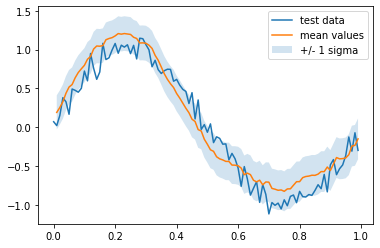

In [34]:
def mean(alpha,beta, new_x, t, x, D):
    sum_vec = phi(x,D) @ t
    s = matrix_s(alpha, beta,x,D)
    return beta * (phi(new_x,D).T).dot( s.dot(sum_vec) )


means     = [0.] * (len(x_prediction) - 1)  # Important, have 0., otherwise will be an array of integers.
variances_min = [0.] * (len(x_prediction) - 1)
variances_max = [0.] * (len(x_prediction) - 1)

for i in range(len(x_prediction) - 1):
    x_vec = np.append(x_vec,x_prediction[i]) # x_vec
    t_vec = np.append(t_vec,t_prediction[i]) # target_vec
    new_datapoint = x_prediction[i + 1]
    #print(len(t_vec),len(x_vec))
    p_t_mean = mean(  alpha,  beta, new_datapoint, t_vec, x_vec, 9)
    p_t_var = var(alpha, beta, new_datapoint, x_vec, 9)
    means[i] = p_t_mean
    variances_min[i] = 2*p_t_var + means[i]
    variances_max[i] = means[i] - 2*p_t_var

plt.plot(x_prediction, t_prediction, label = 'test data')
plt.plot(x_prediction[1:], means, label = 'mean values')
plt.fill_between(x_prediction[1:], variances_min, variances_max, alpha=0.2,label = '+/- 1 sigma')
#ax.plot(x_predict[1:],means,c='green')
#miny = [y[1] for y in variances]
#maxy = [y[0] for y in variances]
#ax.fill_between(x_predict[1:].T[0],miny,maxy,alpha=0.2,color='red')

plt.legend()
plt.show()

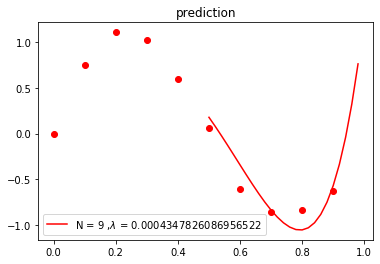

In [35]:
## x,t - training values
## x_for_fit, pol(w1, x_for_fit, N) - our prediction

alpha = 5*10**(-3)
beta = 11.5

x_for_fit = np.arange(0.5,x_max,(x_max - x_min)/50 )

N = 9
w_initial = [0]*(N+1)
w = [0]*(N+1)
errfunc_reg = lambda w, x, t: beta*np.mean( ( pol(w, x, N) - t )**2 ) + w.T @ w * alpha/2 
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'N = 9 ,$\lambda$ = '+ str(alpha/beta)) # Plot of the data and the fit
#plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.title('prediction')
plt.legend()
plt.show() 

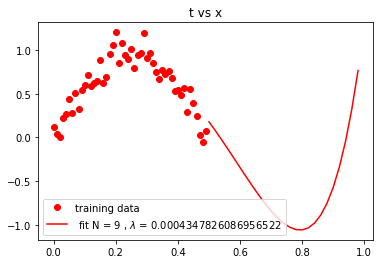

In [36]:
x_known = np.arange(0,0.5,0.01)
t_known = np.sin(2*np.pi*x_known)
noise = np.random.normal(0,0.1,50)
t_known += noise

plt.plot(x_known, t_known, "ro",label = 'training data')


#plt.plot(x_prediction, t_prediction, "o",label = 'need to predict t')
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = ' fit N = 9 , $\lambda$ = '+ str(alpha/beta)) # Plot of the data and the fit
#plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.title('t vs x')
plt.legend()
plt.show() 
x_vec = x_known
t_vec = t_known
x_prediction = x_for_fit
t_prediction = pol(w1, x_for_fit, N)

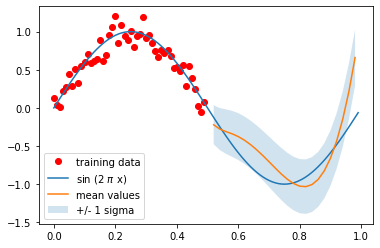

In [37]:
def mean(alpha,beta, new_x, t, x, D):
    sum_vec = phi(x,D) @ t
    s = matrix_s(alpha, beta,x,D)
    return beta * (phi(new_x,D).T).dot( s.dot(sum_vec) )


means     = [0.] * (len(x_prediction) - 1)  # Important, have 0., otherwise will be an array of integers.
variances_min = [0.] * (len(x_prediction) - 1)
variances_max = [0.] * (len(x_prediction) - 1)

for i in range(len(x_prediction) - 1):
    x_vec = np.append(x_vec,x_prediction[i]) # x_vec
    t_vec = np.append(t_vec,t_prediction[i]) # target_vec
    new_datapoint = x_prediction[i + 1]
    #print(len(t_vec),len(x_vec))
    p_t_mean = mean(  alpha,  beta, new_datapoint, t_vec, x_vec, 9)
    p_t_var = var(alpha, beta, new_datapoint, x_vec, 9)
    means[i] = p_t_mean
    variances_min[i] = 2*p_t_var + means[i]
    variances_max[i] = means[i] - 2*p_t_var
plt.plot(x_known, t_known, "ro",label = 'training data')
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.plot(x_prediction[1:], means, label = 'mean values')
plt.fill_between(x_prediction[1:], variances_min, variances_max, alpha=0.2,label = '+/- 1 sigma')
#ax.plot(x_predict[1:],means,c='green')
#miny = [y[1] for y in variances]
#maxy = [y[0] for y in variances]
#ax.fill_between(x_predict[1:].T[0],miny,maxy,alpha=0.2,color='red')

plt.legend()
plt.show()

### 1.3 Model selection
### 1.4 The Curse of Dimensionality
Oil data set taken from https://inverseprobability.com/3PhaseData.html

In [38]:
from pandas import DataFrame, read_csv
import pandas as pd 
df = pd.read_csv('3PhData/DataTrn.txt', sep = "\s+", header = None)
print(df)

         0       1       2       3       4       5       6       7       8   \
0    0.3315  0.2156  0.6802  0.1434  0.6825  0.2720  0.6223  0.2092  0.7961   
1    0.0939  1.0089  0.0365  0.6944  0.0908  0.4961  0.0722  0.6521 -0.0130   
2    0.5184  0.2283  0.5300  0.6884  0.7456  0.6171  0.6136  0.5928  0.7678   
3    0.4208  0.6740  0.1651  0.7592  0.1810  0.5448  0.1707  0.7554  0.1635   
4    0.3130  0.6465  0.5908  0.6924  0.7664  0.6262  1.7177  0.0150  0.0851   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.1312  0.7093  0.3948  0.7673  0.5272  0.7554  1.7433 -0.0125  0.0235   
996  0.1263  0.6105  0.2655  0.8748  0.2336  1.0768  0.1833  0.9726  0.3004   
997  0.6043  0.4914  1.0900  0.5961  1.0569  0.8966  1.0279  0.6694  1.2127   
998  1.0284  0.0893  0.4097  0.9375  0.2813  0.6865  0.3827  0.9620  0.2830   
999 -0.0197  0.7719  0.4634  0.5700  0.5143  0.6520 -0.0258  1.7626 -0.0173   

         9       10      11  
0    0.1530  0.5856  

In [39]:
df.drop(columns=[0,1,2,3,4,5,8,9,10,11],inplace=True)

In [40]:
df

,6,7
0,0.6223,0.2092
1,0.0722,0.6521
2,0.6136,0.5928
3,0.1707,0.7554
4,1.7177,0.0150
...,...,...
995,1.7433,-0.0125
996,0.1833,0.9726
997,1.0279,0.6694
998,0.3827,0.9620


In [41]:
from pandas import DataFrame, read_csv
import pandas as pd 
df_label = pd.read_csv('3PhData/DataTrnLbls.txt', sep = "\s+", header = None)
print(df_label)

       0    1    2
0    1.0  0.0  0.0
1    0.0  1.0  0.0
2    1.0  0.0  0.0
3    0.0  1.0  0.0
4    0.0  0.0  1.0
..   ...  ...  ...
995  0.0  0.0  1.0
996  1.0  0.0  0.0
997  1.0  0.0  0.0
998  0.0  1.0  0.0
999  0.0  0.0  1.0

[1000 rows x 3 columns]


In [42]:
oil_data = pd.concat([df, df_label], axis=1)
oil_data.columns=['x6','x7','homogenous', 'annular', 'laminar']
oil_data

,x6,x7,homogenous,annular,laminar
0,0.6223,0.2092,1.0,0.0,0.0
1,0.0722,0.6521,0.0,1.0,0.0
2,0.6136,0.5928,1.0,0.0,0.0
3,0.1707,0.7554,0.0,1.0,0.0
4,1.7177,0.0150,0.0,0.0,1.0
...,...,...,...,...,...
995,1.7433,-0.0125,0.0,0.0,1.0
996,0.1833,0.9726,1.0,0.0,0.0
997,1.0279,0.6694,1.0,0.0,0.0
998,0.3827,0.9620,0.0,1.0,0.0


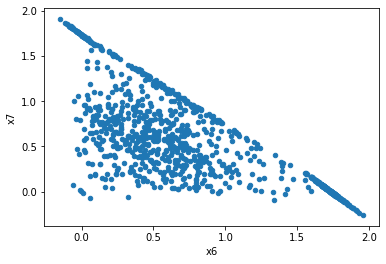

In [43]:
oil_data.plot.scatter(x='x6', y='x7')